<a href="https://colab.research.google.com/github/EngrLawal/EngrLawal/blob/main/Road_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
import pandas as pd
import csv
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
import folium
import geopy.distance
import geopandas as gpd
%matplotlib inline


from geopandas import GeoDataFrame
from shapely.geometry import Point
from numpy import mean
from numpy import std
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from geopy.distance import Distance
from folium import plugins
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 355 kB/s 
     |████████████████████████████████| 6.3 MB 29.0 MB/s 


# Try to Understand Data by checking Columns and few rows

In [ ]:
acc_df = pd.read_csv('/content/drive/MyDrive/Big_data/Road Safety Data - Accidents 2019.csv', dtype = {'Accident_Index': "string"})
cas_df = pd.read_csv('/content/drive/MyDrive/Big_data/Road Safety Data - Casualties 2019.csv', dtype = {'Accident_Index': "string"})
veh_df = pd.read_csv('/content/drive/MyDrive/Big_data/Road Safety Data- Vehicles 2019.csv', dtype = {'Accident_Index': "string"})

In [ ]:
acc_df.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117


In [ ]:
cas_df.head(2)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5


In [ ]:
veh_df.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2


In [ ]:
print('Accident Features: ',acc_df.columns)
print('Casualty Features: ',cas_df.columns)
print('Vehicle Features: ',veh_df.columns)

Accident Features:  Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')
Casualty Features:  Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_B

###Relationship and connection of the dataset
- Accident data gives details about the accident that happened on how, when and where it happened
- Casualty data gives details about the personality of the people invoved in the accident and how severe the accident is
- Vehicle data gives detail about the vehicles involved in a particular accident
-Accident index is the primary key that connects all the the three data
- There is a vehicle reference column in casualty table which is a foreign key that linked it to vehicle table

#Exploratory Data Analysis

##Casualty data

In [ ]:
print(cas_df.shape)
cas_df.info()

(153158, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  string
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger    

- Casualties data has 153,158 observations (rows) and 16 features (columns)
- 15 features are integer (int64) and only 1 categorical variable
- seems that there is no missing value but further checks is required to be sure

In [ ]:
missing_values = cas_df.replace(-1, np.nan)
missing_values.isna().sum()

Accident_Index                            0
Vehicle_Reference                         0
Casualty_Reference                        0
Casualty_Class                            0
Sex_of_Casualty                         733
Age_of_Casualty                        3255
Age_Band_of_Casualty                   3255
Casualty_Severity                         0
Pedestrian_Location                       1
Pedestrian_Movement                       0
Car_Passenger                           589
Bus_or_Coach_Passenger                   84
Pedestrian_Road_Maintenance_Worker       74
Casualty_Type                             5
Casualty_Home_Area_Type               17381
Casualty_IMD_Decile                   15372
dtype: int64

- Thorogh checks on variable look up sheet gave us insight on some features with -1 being either missing values or outliers

### Review all the features in the casualties dataframe and clean appropriately

In [ ]:
cas_df.Sex_of_Casualty.unique()
## Sex_of_Casualty has a -1 as value

array([ 1,  2, -1])

In [ ]:
print(cas_df['Sex_of_Casualty'].mode())
print(cas_df['Sex_of_Casualty'].median())
print(cas_df['Sex_of_Casualty'].mean())
# from the outcome, it is observed that 1 is most commonly occuring 'Sex_of_Casualty'.

0    1
dtype: int64
1.0
1.3897543713028375


In [ ]:
#Replace -1 with 1 in the 'Sex_of_Casualty'
cas_df['Sex_of_Casualty'].replace(-1, 1, inplace= True)

In [ ]:
cas_df.Age_of_Casualty.unique()
## Age_of_Casualty has a value of -1

array([ 58,  -1,  24,  21,  68,  47,  16,  20,  41,  25,  40,  28,  74,
        34,  23,  38,  37,  29,  22,  30,  26,  35,  19,  27,  63,  17,
        65,  12,  36,  33,  42,  45,  49,  32,  44,  46,   3,  79,  78,
        67,  50,  60,  31,   2,  11,  18,  52,   9,  57,  53,  70,  14,
        48,  59,   6,  62,  13,  10,  71,  76,  77,  55,  69,  54,  81,
        15,  56,  43,  39,   5,  90,   8,  51,   0,   1,   7,  61,  75,
         4,  82,  64,  66,  83,  73,  85,  72,  94,  80,  91,  84,  86,
        88,  92,  89,  87,  96,  93,  95,  98,  99,  97, 102, 101])

In [ ]:
print(cas_df['Age_of_Casualty'].mode())
print(cas_df['Age_of_Casualty'].median())
print(cas_df['Age_of_Casualty'].mean())

0    30
dtype: int64
34.0
36.93261207380613


In [ ]:
#Replace -1 with 30 in the 'Age_of_Casualty'
cas_df['Age_of_Casualty'].replace(-1, 34, inplace= True)

In [ ]:
cas_df.Age_Band_of_Casualty.unique()
# Age_Band_of_Casualty has a value of -1

array([ 9, -1,  5, 10,  8,  4,  7,  6,  3,  1, 11,  2])

In [ ]:
print(cas_df['Age_Band_of_Casualty'].mode())
print(cas_df['Age_Band_of_Casualty'].median())
print(cas_df['Age_Band_of_Casualty'].mean())
# from the outcome, it is observed that 6 is most commonly occuring 'Age_Band_of_Casualty'.

0    6
dtype: int64
6.0
6.322346857493569


In [ ]:
#Replace -1 with 6 in the 'Age_Band_of_Casualty'
cas_df['Age_Band_of_Casualty'].replace(-1, 6, inplace= True)

In [ ]:
cas_df.Pedestrian_Location.unique()
# Pedestrian_Location has a value of -1

array([ 0,  5,  1, 10,  9,  6,  4,  8,  3,  2,  7, -1])

In [ ]:
print(cas_df['Pedestrian_Location'].mode())
print(cas_df['Pedestrian_Location'].median())
print(cas_df['Pedestrian_Location'].mean())
# from the outcome, it is observed that 0 is most commonly occuring 'Pedestrian_Location'.

0    0
dtype: int64
0.0
0.760711161023257


In [ ]:
#Replace -1 with 0 in the 'Age_Band_of_Casualty'
cas_df['Pedestrian_Location'].replace(-1, 0, inplace= True)

In [ ]:
cas_df.Car_Passenger.unique()
# Car_Passenger has a value of -1

array([ 0,  1,  2, -1])

In [ ]:
print(cas_df['Car_Passenger'].mode())
print(cas_df['Car_Passenger'].median())
print(cas_df['Car_Passenger'].mean())
# from the outcome, it is observed that 0 is most commonly occuring 'Car_Passenger'.

0    0
dtype: int64
0.0
0.23932148500241582


In [ ]:
#Replace -1 with 0 in the 'Car_Passenger'
cas_df['Car_Passenger'].replace(-1, 0, inplace= True)

In [ ]:
cas_df.Bus_or_Coach_Passenger.unique()
# Bus_or_Coach_Passenger has a value of -1

array([ 0,  4,  3,  1,  2, -1])

In [ ]:
print(cas_df['Bus_or_Coach_Passenger'].mode())
print(cas_df['Bus_or_Coach_Passenger'].median())
print(cas_df['Bus_or_Coach_Passenger'].mean())
# from the outcome, it is observed that 0 is most commonly occuring 'Bus_or_Coach_Passenger'.

0    0
dtype: int64
0.0
0.06266078167643871


In [ ]:
#Replace -1 with 0 in the 'Bus_or_Coach_Passenger'
cas_df['Bus_or_Coach_Passenger'].replace(-1, 0, inplace= True)

In [ ]:
cas_df.Pedestrian_Road_Maintenance_Worker.unique()
# Pedestrian_Road_Maintenance_Worker has a value of -1

array([ 0,  2,  1, -1])

In [ ]:
print(cas_df['Pedestrian_Road_Maintenance_Worker'].mode())
print(cas_df['Pedestrian_Road_Maintenance_Worker'].median())
print(cas_df['Pedestrian_Road_Maintenance_Worker'].mean())
# from the outcome, it is observed that 0 is most commonly occuring 'Pedestrian_Road_Maintenance_Worker'.

0    0
dtype: int64
0.0
0.01658418104179997


In [ ]:
#Replace -1 with 0 in the 'Pedestrian_Road_Maintenance_Worker'
cas_df['Pedestrian_Road_Maintenance_Worker'].replace(-1, 0, inplace= True)

In [ ]:
cas_df.Casualty_Type.unique()
# Casualty_Home_Area_Type has a value -1

array([ 9,  1,  0,  8,  4,  3,  5, 11,  2, 22, 23, 19, 90, 97, 98, 16, 20,
       10, -1, 21, 17, 18])

In [ ]:
print(cas_df['Casualty_Type'].mode())
print(cas_df['Casualty_Type'].median())
print(cas_df['Casualty_Type'].mean())
# from the outcome, it is observed that 9 is most commonly occuring 'Casualty_Type'.

0    9
dtype: int64
9.0
7.141148356599068


In [ ]:
#Replace -1 with 9 in the 'Casualty_Type'
cas_df['Casualty_Type'].replace(-1, 9, inplace= True)

In [ ]:
cas_df.Casualty_Home_Area_Type.unique()
# Casualty_Home_Area_Type has a value -1

array([ 1, -1,  3,  2])

In [ ]:
print(cas_df['Casualty_Home_Area_Type'].mode())
print(cas_df['Casualty_Home_Area_Type'].median())
print(cas_df['Casualty_Home_Area_Type'].mean())
# from the outcome, it is observed that 1 is most commonly occuring 'Casualty_Home_Area_Type'.

0    1
dtype: int64
1.0
1.0361260920095587


In [ ]:
#Replace -1 with 1 in the 'Casualty_Home_Area_Type'
cas_df['Casualty_Home_Area_Type'].replace(-1, 1, inplace= True)

In [ ]:
cas_df.Casualty_IMD_Decile.unique()
# Casualty_IMD_Decile has a value of -1

array([ 2,  5,  3,  1,  4, -1,  6,  8, 10,  9,  7])

In [ ]:
print(cas_df['Casualty_IMD_Decile'].mode())
print(cas_df['Casualty_IMD_Decile'].median())
print(cas_df['Casualty_IMD_Decile'].mean())
# from the outcome, it is observed that mean and median values are close to each other  'Casualty_IMD_Decile'.

0    2
dtype: int64
4.0
4.382435132346988


In [ ]:
#Replace -1 with 4 (median value) in the 'Casualty_IMD_Decile'
cas_df['Casualty_IMD_Decile'].replace(-1, 4, inplace= True)

## Vehicle Data

In [ ]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  string
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

- There are 216,381 entries (rows) and 23 features (columns)
- 22 columns are integers (int64) and only 1 categorical variable
- It appears there is null values but further checks is required to be certain

In [ ]:
missing_value = veh_df.replace(-1, np.nan)
missing_value.isna().sum()

Accident_Index                          0
Vehicle_Reference                       0
Vehicle_Type                          309
Towing_and_Articulation              4527
Vehicle_Manoeuvre                   13063
Vehicle_Location-Restricted_Lane    12746
Junction_Location                    9531
Skidding_and_Overturning            13361
Hit_Object_in_Carriageway           13057
Vehicle_Leaving_Carriageway         12916
Hit_Object_off_Carriageway          12271
1st_Point_of_Impact                  6681
Was_Vehicle_Left_Hand_Drive?        11051
Journey_Purpose_of_Driver              58
Sex_of_Driver                           1
Age_of_Driver                       29756
Age_Band_of_Driver                  29756
Engine_Capacity_(CC)                54958
Propulsion_Code                     54447
Age_of_Vehicle                      61755
Driver_IMD_Decile                   42385
Driver_Home_Area_Type               44869
Vehicle_IMD_Decile                  42385
dtype: int64

Only Accident index and vehicle reference has no missing values

### Review all the features in the vehicle dataframe and clean appropriately

In [ ]:
veh_df = veh_df.astype({'Accident_Index': str})

#### Reveiwing Vehicle Type

In [ ]:
# we then find the mode, mean and median vehicle type
print(veh_df['Vehicle_Type'].mode())
print(veh_df['Vehicle_Type'].median())
print(veh_df['Vehicle_Type'].mean())
# from the outcome we see that 9 which is Car is the most occuring in every category

0    9
dtype: int64
9.0
9.706730258201969


In [ ]:
veh_df['Vehicle_Type'].replace(-1, 9, inplace= True)

#### Reviewing Towing_and_Articulation

In [ ]:
print(veh_df['Towing_and_Articulation'].mode())
print(veh_df['Towing_and_Articulation'].median())
print(veh_df['Towing_and_Articulation'].mean())
# from the outcome we see that 0 which is 'no Tow/Articulaltion' is the most occuring in every category

0    0
dtype: int64
0.0
0.008591327334655076


In [ ]:
veh_df['Towing_and_Articulation'].replace(-1, 0, inplace= True)

#### Reviewing Vehicle_Manoeuvre

In [ ]:
print(veh_df['Vehicle_Manoeuvre'].mode())
print(veh_df['Vehicle_Manoeuvre'].median())
print(veh_df['Vehicle_Manoeuvre'].mean())
# I decide here to take the mode 18 which is the most occuring number in the column 

0    18
dtype: int64
17.0
11.994897888446767


In [ ]:
veh_df['Vehicle_Manoeuvre'].replace(-1, 18, inplace= True)

#### Reviewing Vehicle_Location-Restricted_Lane

In [ ]:
print(veh_df['Vehicle_Location-Restricted_Lane'].mode())
print(veh_df['Vehicle_Location-Restricted_Lane'].median())
print(veh_df['Vehicle_Location-Restricted_Lane'].mean())

0    0
dtype: int64
0.0
0.12434548319861725


In [ ]:
veh_df['Vehicle_Location-Restricted_Lane'].replace(-1, 0, inplace= True)

#### Reviewing Junction_Location

In [ ]:
print(veh_df['Junction_Location'].mode())
print(veh_df['Junction_Location'].median())
print(veh_df['Junction_Location'].mean())

0    0
dtype: int64
1.0
2.072561823820021


In [ ]:
veh_df['Junction_Location'].replace(-1, 0, inplace= True)

#### Reviewing Skidding_and_Overturning

In [ ]:
print(veh_df['Skidding_and_Overturning'].mode())
print(veh_df['Skidding_and_Overturning'].median())
print(veh_df['Skidding_and_Overturning'].mean())
print(veh_df['Skidding_and_Overturning'].unique())

0    0
dtype: int64
0.0
0.14336748605469057
[-1  0  2  1  5  4  3]


In [ ]:
veh_df['Skidding_and_Overturning'].replace(-1, 0, inplace= True)

#### Reviewing Hit_Object_in_Carriageway

In [ ]:
print(veh_df['Hit_Object_in_Carriageway'].mode())
print(veh_df['Hit_Object_in_Carriageway'].median())
print(veh_df['Hit_Object_in_Carriageway'].mean())
print(veh_df['Hit_Object_in_Carriageway'].unique())

# 0 is the most occuring number across the different parameters

0    0
dtype: int64
0.0
0.25958841118212783
[-1  0 11  4 12 10  7  9  8  6  2  1  5]


In [ ]:
veh_df['Hit_Object_in_Carriageway'].replace(-1, 0, inplace= True)

#### Reviewing Vehicle_Leaving_Carriageway

In [ ]:
print(veh_df['Vehicle_Leaving_Carriageway'].unique())
print(veh_df['Vehicle_Leaving_Carriageway'].mode())
print(veh_df['Vehicle_Leaving_Carriageway'].median())
print(veh_df['Vehicle_Leaving_Carriageway'].mean())


[-1  0  3  1  7  2  4  6  8  5]
0    0
dtype: int64
0.0
0.252397391637898


In [ ]:
veh_df['Vehicle_Leaving_Carriageway'].replace(-1, 0, inplace= True)

#### Reviewing Hit_Object_off_Carriageway

In [ ]:
veh_df[veh_df['Hit_Object_off_Carriageway']==-1].head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,18,0,0,0,0,0,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,18,0,0,0,0,0,...,6,3,-1,-1,-1,-1,-1,2,1,2


In [ ]:
print(veh_df['Hit_Object_off_Carriageway'].unique())
print(veh_df['Hit_Object_off_Carriageway'].mode())
print(veh_df['Hit_Object_off_Carriageway'].median())
print(veh_df['Hit_Object_off_Carriageway'].mean())

[-1  0  1 11 10  4  7  5  3  2  6  9  8]
0    0
dtype: int64
0.0
0.3454092549715548


In [ ]:
veh_df['Hit_Object_off_Carriageway'].replace(-1, 0, inplace= True)

#### Reviewing 1st_Point_of_Impact

In [ ]:
print(veh_df['1st_Point_of_Impact'].unique())
print(veh_df['1st_Point_of_Impact'].mode())
print(veh_df['1st_Point_of_Impact'].median())
print(veh_df['1st_Point_of_Impact'].mean())
# here we decide to replace the null values with the median as it seems more popular across the different parameters

[ 4 -1  1  2  0  3]
0    1
dtype: int64
1.0
1.6681316751470785


In [ ]:
veh_df['1st_Point_of_Impact'].replace(-1, 1 ,inplace= True)

#### Reviewing Was_Vehicle_Left_Hand_Drive?

In [ ]:
print(veh_df['Was_Vehicle_Left_Hand_Drive?'].unique())
print(veh_df['Was_Vehicle_Left_Hand_Drive?'].mode())
print(veh_df['Was_Vehicle_Left_Hand_Drive?'].median())
print(veh_df['Was_Vehicle_Left_Hand_Drive?'].mean())

# the median and the mean parameters both tilt to 1

[-1  1  2]
0    1
dtype: int64
1.0
0.9036375652206062


In [ ]:
veh_df['Was_Vehicle_Left_Hand_Drive?'].replace(-1, 1 ,inplace= True)

#### Reviewing:  Journey_Purpose_of_Driver

In [ ]:
veh_df['Journey_Purpose_of_Driver'].unique()

array([ 6,  1,  2,  3,  4, -1,  5])

In [ ]:
#I decide to replace the missing values with 6(Not known) as this is the most logical thing to do
veh_df['Journey_Purpose_of_Driver'].replace(-1, 6 ,inplace= True)

#### Reviewing: Sex_of_Driver

In [ ]:
print(veh_df['Sex_of_Driver'].unique())
print(veh_df['Sex_of_Driver'].mode())

[ 1  3  2 -1]
0    1
dtype: int64


In [ ]:
veh_df['Sex_of_Driver'].replace(-1, 1,inplace= True) # we replace the missing data with 1(mode)

#### Reviewing: Age_of_Driver

In [ ]:
veh_df['Age_of_Driver'].unique()

array([ 58,  -1,  24,  45,  33,  32,  47,  25,  20,  65,  81,  34,  43,
        28,  42,  30,  29,  26,  35,  19,  54,  63,  52,  23,  12,  31,
        41,  49,  44,  55,  17,  48,  39,  40,  38,  22,  66,  37,  16,
        50,  60,  18,  27,  51,  71,  57,  21,  70,  59,  36,  53,  62,
        13,  76,  82,  64,  46,  56,  69,  68,  75,  78,  73,  11,  72,
        61,  88,  74,  84,  80,  83,  79,  85,   7,  67,  95,  77,  15,
        91,  10,  86,  87,   9,  14,  90,  92,   8,  89,   5,  94,  99,
        93,   4,  98,   6,  96,   1,   3,   2,  97, 101, 102])

In [ ]:
list_of_values = [1,2,3,4,5,6,7,8,9,10,11, 12,13,14,15]

Underaged_driver = veh_df[veh_df['Age_of_Driver'].isin(list_of_values)]
#Underaged_driver 
# 2134 underaged drivers

In [ ]:
Underaged_driver.Age_of_Driver.value_counts()

15    411
14    386
13    351
12    347
11    232
10    123
9      87
8      73
7      52
6      29
5      18
4      12
3       7
1       4
2       2
Name: Age_of_Driver, dtype: int64

In [ ]:
#print(veh_df['Was_Vehicle_Left_Hand_Drive?'].unique())
print(veh_df['Age_of_Driver'].mode())
print(veh_df['Age_of_Driver'].median())
print(veh_df['Age_of_Driver'].mean())


0   -1
dtype: int64
35.0
35.09474491752973


In [ ]:
# Mean and Median Age_of_Driver ~~ 35, replace -1 with 35
veh_df['Age_of_Driver'].replace(-1, 35,inplace= True)

#### Reviewing: Age_Band_of_Driver

In [ ]:
print(veh_df['Age_Band_of_Driver'].unique())
print(veh_df['Age_Band_of_Driver'].mode())
print(veh_df['Age_Band_of_Driver'].median())
print(veh_df['Age_Band_of_Driver'].mean())

[ 9 -1  5  7  6  8  4 11  3 10  2  1]
0    6
dtype: int64
6.0
5.850106987212371


In [ ]:
# Mean and Median Age_of_Driver ~~ 35, replace -1 with 6
veh_df['Age_Band_of_Driver'].replace(-1, 6,inplace= True)

#### Reviewing: Engine_Capacity_(CC) 

In [ ]:
print(veh_df['Engine_Capacity_(CC)'].unique())
print(veh_df['Engine_Capacity_(CC)'].mode())
print(veh_df['Engine_Capacity_(CC)'].median())
print(veh_df['Engine_Capacity_(CC)'].mean())

[   -1  1242   998 ...  3564 10383  2900]
0   -1
dtype: int64
1390.0
1378.9495889195448


In [ ]:
# Mean and Median of Engine_Capacity_(CC) are close, replace -1 with 1390
veh_df['Engine_Capacity_(CC)'].replace(-1, 1390,inplace= True)

#### Reviewing: Propulsion_Code

In [ ]:
print(veh_df['Propulsion_Code'].unique())
print(veh_df['Propulsion_Code'].mode())
print(veh_df['Propulsion_Code'].median())
print(veh_df['Propulsion_Code'].mean())

[-1  1  2  8  3  5 12  7  6  9  4]
0    1
dtype: int64
1.0
0.9780294942716782


In [ ]:
# Mean, Mode and Median of Propulsion_Code are close, replace -1 with 1
veh_df['Propulsion_Code'].replace(-1, 1,inplace= True)

#### Reviewing: Age_of_Vehicle

In [ ]:
print(veh_df['Age_of_Vehicle'].unique())
print(veh_df['Age_of_Vehicle'].mode())
print(veh_df['Age_of_Vehicle'].median())
print(veh_df['Age_of_Vehicle'].mean())	

[-1  4  1 14  7 12 15 11  5  2 10 17  8 22  9  6 18  3 16 27 13 20 21 19
 23 26 24 38 53 30 25 29 37 28 33 39 31 36 44 40 35 57 34 41 59 32 42 45
 87 94 63 52 48 90 54 47 60 55 66 43 58 50 46 88 72 51 74 65 56 77 62 61
 71 49 80]
0   -1
dtype: int64
4.0
5.597275176655991


In [ ]:
# Mean and Median of Age_of_Vehicle are close, replace -1 with 4
veh_df['Age_of_Vehicle'].replace(-1, 6,inplace= True)

#### Reviewing: Driver_IMD_Decile

In [ ]:
print(veh_df['Driver_IMD_Decile'].unique())
print(veh_df['Driver_IMD_Decile'].mode())
print(veh_df['Driver_IMD_Decile'].median())
print(veh_df['Driver_IMD_Decile'].mean())

[ 2  3  6  4 -1  5  7  8  1  9 10]
0   -1
dtype: int64
4.0
3.922322200193178


In [ ]:
# Mean and Median of Driver_IMD_Decile are close, replace -1 with 4
veh_df['Driver_IMD_Decile'].replace(-1, 4,inplace= True)

#### Reviewing: Driver_Home_Area_Type

In [ ]:
print(veh_df['Driver_Home_Area_Type'].unique())
print(veh_df['Driver_Home_Area_Type'].mode())
print(veh_df['Driver_Home_Area_Type'].median())
print(veh_df['Driver_Home_Area_Type'].mean())

[ 1 -1  2  3]
0    1
dtype: int64
1.0
0.8320693591396657


In [ ]:
# Mode, Mean and Median of Driver_Home_Area_Type are close, replace -1 with 1
veh_df['Driver_Home_Area_Type'].replace(-1, 1,inplace= True)

#### Reviewing: Vehicle_IMD_Decile

In [ ]:
print(veh_df['Vehicle_IMD_Decile'].unique())
print(veh_df['Vehicle_IMD_Decile'].mode())
print(veh_df['Vehicle_IMD_Decile'].median())
print(veh_df['Vehicle_IMD_Decile'].mean())

[ 2  3  6  4 -1  5  7  8  1  9 10]
0   -1
dtype: int64
4.0
3.922322200193178


In [ ]:
# Mean and Median of Vehicle_IMD_Decile are close, replace -1 with 4
veh_df['Vehicle_IMD_Decile'].replace(-1, 4,inplace= True)

In [ ]:
veh_df.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,18,0,0,0,0,0,...,6,1,58,9,1390,1,6,2,1,2
1,2019010128300,2,9,0,18,0,0,0,0,0,...,6,3,35,6,1390,1,6,2,1,2


##Accident Data

#### Reviewing Accident dataframe and clean appropriately

In [ ]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  string 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [ ]:
acc_df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

- There are 117,536 entries (rows) and 32 features (columns)
- 29 columns are numrical and only 1 categorical variable and 1 object
- Five features has null values but further checks is required to be certain they are the only one

In [ ]:
missing_value = acc_df.replace(-1, np.nan)
missing_value.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                             28
Location_Northing_OSGR                            28
Longitude                                         28
Latitude                                          28
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              63
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                       80
Junction_Detail                               

- It was discovered after further checks that 17 features have one or more missing values as against five obtained before

#### Average Longitude and Latitude

In [ ]:
missing_long = acc_df[acc_df['Longitude'].isnull()]
missing_long['Police_Force'].unique()

array([ 4,  5,  7, 12, 13, 16, 23, 46, 47, 55, 60, 62, 63])

In [ ]:
def func(x):
    if pd.isna(x["Location_Easting_OSGR"]):
        
        force = x["Police_Force"]
        
        m = acc_df[acc_df.Police_Force==force]["Longitude"].median()
        n = acc_df[acc_df.Police_Force==force]["Latitude"].median()
        o = acc_df[acc_df.Police_Force==force]["Location_Easting_OSGR"].median()
        p = acc_df[acc_df.Police_Force==force]["Location_Northing_OSGR"].median()
        
        acc_df.loc[x.name, "Longitude"] = m
        acc_df.loc[x.name, "Latitude"] = n
        acc_df.loc[x.name, "Location_Easting_OSGR"] = o
        acc_df.loc[x.name, "Location_Northing_OSGR"] = p
        
        
#     return False

In [ ]:
replace = acc_df.apply(func, axis=1)

In [ ]:
#acc_df.isna().sum()

#### Function to replace missing values of LSOA_of_Accident_Location and Time

In [ ]:
def clean_acc_df(acc_df):

    acc_df['LSOA_of_Accident_Location'] = acc_df['LSOA_of_Accident_Location'].fillna('Unknown')
    acc_df['Time'] = acc_df['Time'].fillna('00:00')       

    acc_df = acc_df.astype({'Accident_Index': str})
    acc_df['Converted_Time'] = pd.DatetimeIndex(acc_df['Time'])
    acc_df['Decimal_Time'] = round((acc_df['Converted_Time'].dt.hour + acc_df['Converted_Time'].dt.minute/60),2)
    
    
    return acc_df


clean_acc_df = clean_acc_df(acc_df)

#clean_acc_df.info()


### Speed limit replacement of null value





In [ ]:
print(acc_df['Speed_limit'].unique())
print(acc_df['Speed_limit'].mode())
print(acc_df['Speed_limit'].median())
print(acc_df['Speed_limit'].mean())

[30 20 40 50 70 -1 60]
0    30
dtype: int64
30.0
36.77341410291315


In [ ]:
# Mode and Median of accidents['Speed_limit'] are close, replace -1 with 30
acc_df['Speed_limit'].replace(-1, 30,inplace= True)

### Junction Details replacement of null value

---



In [ ]:
print(acc_df['Junction_Detail'].unique())
print(acc_df['Junction_Detail'].mode())
print(acc_df['Junction_Detail'].median())
print(acc_df['Junction_Detail'].mean()) 

[ 1  0  3  6  9  5  7  8  2 -1]
0    0
dtype: int64
1.0
2.299703920500953


In [ ]:
# Mode of acc_df['Junction_Detail'] is resonable for categorical data, replace -1 with 0
acc_df['Junction_Detail'].replace(-1, 0,inplace= True)

### Junction Control replacement of null value

In [ ]:
print(acc_df['Junction_Control'].unique())
print(acc_df['Junction_Control'].mode())
print(acc_df['Junction_Control'].median())
print(acc_df['Junction_Control'].mean())

[ 2 -1  4  3  1  0]
0   -1
dtype: int64
2.0
1.5322454396950722


In [ ]:
# Median and Mean of acc_df['Junction_Control'] are close, replace -1 with 2.0
acc_df['Junction_Control'].replace(-1, 2.0,inplace= True)

### 2nd Road Class replacement of null value


In [ ]:
print(acc_df['2nd_Road_Class'].unique())
print(acc_df['2nd_Road_Class'].mode())
print(acc_df['2nd_Road_Class'].median())
print(acc_df['2nd_Road_Class'].mean())


[ 3 -1  6  4  5  1  2]
0   -1
dtype: int64
3.0
2.618134018513477


In [ ]:
# Median and Mean of acc_df['Junction_Control'] are close, replace -1 with 3.0
acc_df['2nd_Road_Number'].replace(-1, 3.0,inplace= True)

### 2nd Road Number replacement of null value


In [ ]:
print(acc_df['2nd_Road_Number'].unique())
print(acc_df['2nd_Road_Number'].mode())
print(acc_df['2nd_Road_Number'].median())
print(acc_df['2nd_Road_Number'].mean())


[4202    0  510 ...  712  843 6357]
0    0
dtype: int64
0.0
306.33044343860604


In [ ]:
# Median and Mode of acc_df['2nd_Road_Number'] are close, replace -1 with 0
acc_df['2nd_Road_Number'].replace(-1, 0,inplace= True)

### Pedestrian Crossing Human Control replacement of null value


In [ ]:
print(acc_df['Pedestrian_Crossing-Human_Control'].unique())
print(acc_df['Pedestrian_Crossing-Human_Control'].mode())
print(acc_df['Pedestrian_Crossing-Human_Control'].median())
print(acc_df['Pedestrian_Crossing-Human_Control'].mean())

[ 0 -1  2  1]
0    0
dtype: int64
0.0
-0.0057173972229784915


In [ ]:
# Median and Mode of acc_df['Pedestrian_Crossing-Human_Control'] are close, replace -1 with 0
acc_df['Pedestrian_Crossing-Human_Control'].replace(-1, 0,inplace= True)

### Pedestrian Crossing Physical Facilities replacement of null value



In [ ]:
print(acc_df['Pedestrian_Crossing-Physical_Facilities'].unique())
print(acc_df['Pedestrian_Crossing-Physical_Facilities'].mode())
print(acc_df['Pedestrian_Crossing-Physical_Facilities'].median())
print(acc_df['Pedestrian_Crossing-Physical_Facilities'].mean())

[ 5 -1  0  4  8  1  7]
0    0
dtype: int64
0.0
0.8623400490062619


In [ ]:
# Mean, Median and Mode of acc_df['Pedestrian_Crossing-Physical_Facilities'] are close, replace -1 with 0
acc_df['Pedestrian_Crossing-Physical_Facilities'].replace(-1, 0,inplace= True)

### Light condition replacement of null value

In [ ]:
print(acc_df['Light_Conditions'].unique())
print(acc_df['Light_Conditions'].mode())
print(acc_df['Light_Conditions'].median())
print(acc_df['Light_Conditions'].mean())
#Mode was used

[ 1  4  6  7  5 -1]
0    1
dtype: int64
1.0
2.0468877620473727


In [ ]:
#Median and Mode of acc_df['Light_Conditions'] are close, replace -1 with 1
acc_df['Light_Conditions'].replace(-1, 1,inplace= True)

### Pedestrian Road Surface Condition replacement of null value

In [ ]:
print(acc_df['Road_Surface_Conditions'].unique())
print(acc_df['Road_Surface_Conditions'].mode())
print(acc_df['Road_Surface_Conditions'].median())
print(acc_df['Road_Surface_Conditions'].mean())
#mode was used

[ 1  2 -1  4  3  5]
0    1
dtype: int64
1.0
1.2919445956983393


In [ ]:
#Median and Mode of acc_df['Road_Surface_Conditions'] are close, replace -1 with 1
acc_df['Road_Surface_Conditions'].replace(-1, 1,inplace= True)

### Special condtitions at site replacement of null value



In [ ]:
print(acc_df['Special_Conditions_at_Site'].unique())
print(acc_df['Special_Conditions_at_Site'].mode())
print(acc_df['Special_Conditions_at_Site'].median())
print(acc_df['Special_Conditions_at_Site'].mean())
#Mode was used

[ 0 -1  4  1  5  3  6  2  7]
0    0
dtype: int64
0.0
0.07493874217261094


In [ ]:
#Mean, Median and Mode of acc_df['Special_Conditions_at_Site'] are close, replace -1 with 0
acc_df['Special_Conditions_at_Site'].replace(-1, 0,inplace= True)

### Carriageway Hazards replacement of null value



In [ ]:
print(acc_df['Carriageway_Hazards'].unique())
print(acc_df['Carriageway_Hazards'].mode())
print(acc_df['Carriageway_Hazards'].median())
print(acc_df['Carriageway_Hazards'].mean())             


[ 0 -1  3  2  1  6  7]
0    0
dtype: int64
0.0
0.04431833650966512


In [ ]:
#Mean, Median and Mode of acc_df['Carriageway_Hazards'] are close, replace -1 with 0
acc_df['Special_Conditions_at_Site'].replace(-1, 0,inplace= True)

In [ ]:
#acc_df.isna().sum()

##Merging of Vehicle and Accident dataset

In [ ]:
# Merging two data sets into one with inner join by index
veh_acc = pd.merge(clean_acc_df, veh_df, on = ['Accident_Index'])
acc_cas = pd.merge(clean_acc_df, cas_df, on = ['Accident_Index'])
#veh_acc.info()

NameError: ignored

# (a) Are there significant hours of the day, and days of the week, on which accidents occur?

##Accident distribution by hours of the day

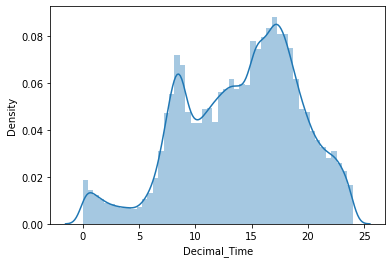

In [ ]:
sns.distplot(clean_acc_df['Decimal_Time'], hist = True, kde = True)
plt.show()

In [ ]:
# Evening is defined as 16:01 to 20:00
#Quantify (in terms of standard deviations) just how much more likely accidents are 
# at evening rush hours compared to the rest of the hours of the day
#df["Code"]= np.where(df["Total Time"]<6.00,1,df["Code"])
rush_hours = clean_acc_df['Decimal_Time'].between(16.01,20.00)


def rest_of_hours(times):
    if times >16.00 and times <20.01:
        return False
    else:
        return True
    


#rest_of_the_day_timeset = np.where((clean_acc_df['Decimal_Time']<16.01) or (clean_acc_df['Decimal_Time']>20.00))

#clean_acc_df[rest_of_the_day_timeset]

In [ ]:
rest_of_hour= clean_acc_df.Decimal_Time.apply(rest_of_hours)
#clean_acc_df.Decimal_Time.interpolate(inplace=True)

std_eve_hrs = clean_acc_df[rush_hours]['Decimal_Time'].std()        # evening hour standard deviation
std_rest_of_the_day = clean_acc_df[rest_of_hour]['Decimal_Time'].std()  #rest of hours
print('Evening Standard Deviation: ', std_eve_hrs)
print('Rest of the hours Standard Deviation: ',std_rest_of_the_day)

Evening Standard Deviation:  1.0909968664396026
Rest of the hours Standard Deviation:  5.412794983841141


##  Accident distribution by day of the week

---



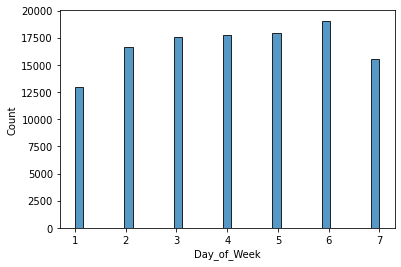

In [ ]:
#plt.figure(figsize = (10,10))

sns.histplot(clean_acc_df['Day_of_Week'])

plt.show()

#(b) For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

Code for Motorbikes
- 2 for Motorcycle 50cc and under
- 3 for Motorcycle 125cc and under
- 4 for Motorcycle over 125cc and up to 500cc
- 5 for Motorcycle over 500cc
- 23 for Electric motorcycle
- 97 for Motorcycle - unknown cc

##Motorbikes Accident distribution by hours of the day

In [ ]:
motorbikes = veh_acc[(veh_acc["Vehicle_Type"] == 2) |
                (veh_acc["Vehicle_Type"] == 3) |
                (veh_acc["Vehicle_Type"] == 4) |
                (veh_acc["Vehicle_Type"] == 5) |
                (veh_acc["Vehicle_Type"] == 23)|
                (veh_acc["Vehicle_Type"] == 97)]

Decimal_Time = clean_acc_df["Decimal_Time"]
motorbikes["Decimal_Time"] = Decimal_Time

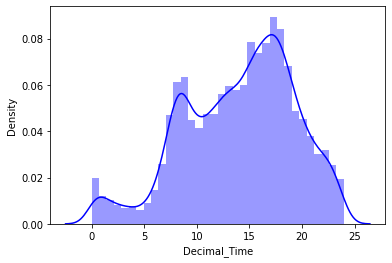

In [ ]:
sns.distplot(motorbikes['Decimal_Time'], hist = True, kde = True, color = 'blue')
plt.show()

In [ ]:
# Evening is defined as 16:01 to 20:00
#Quantify (in terms of standard deviations) just how much more likely accidents are 
# at evening rush hours compared to the rest of the hours of the day
#df["Code"]= np.where(df["Total Time"]<6.00,1,df["Code"])
rush_hours = motorbikes['Decimal_Time'].between(16.01,20.00)


def rest_of_hours(time):
    if time >16.00 and time <20.01:
        return False
    else:
        return True
    

In [ ]:
rest_of_hour= motorbikes.Decimal_Time.apply(rest_of_hours)
#clean_acc_df.Decimal_Time.interpolate(inplace=True)

std_eve_hrs = motorbikes[rush_hours]['Decimal_Time'].std()        # evening hour standard deviation
std_rest_of_the_day = motorbikes[rest_of_hour]['Decimal_Time'].std()  #rest of hours
print('Evening Standard Deviation: ', std_eve_hrs)
print('Rest of the hours Standard Deviation: ',std_rest_of_the_day)

Evening Standard Deviation:  1.081515191322552
Rest of the hours Standard Deviation:  5.469258983131101


##  Motorbikes Accident distribution by day of the week

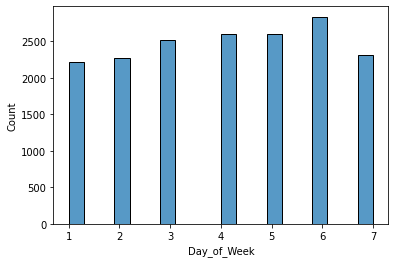

In [ ]:
sns.histplot(motorbikes['Day_of_Week'])

plt.show()

#(c) For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

#####Casualty class code



*   Driver or Rider    1
*   Passenger          2
*   Pedestrian         3

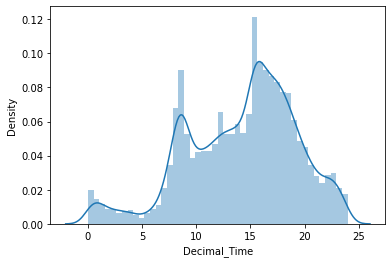

In [ ]:
ped_hour = acc_cas[acc_cas['Casualty_Class']==3]
sns.distplot(ped_hour['Decimal_Time'], hist = True, kde = True)
plt.show()

In [ ]:
# Evening is defined as 16:01 to 20:00
#Quantify (in terms of standard deviations) just how much more likely accidents are 
# at evening rush hours compared to the rest of the hours of the day
#df["Code"]= np.where(df["Total Time"]<6.00,1,df["Code"])
rush_hours = acc_cas['Decimal_Time'].between(16.01,20.00)


def rest_of_hours(time):
    if time >16.00 and time <20.01:
        return False
    else:
        return True

In [ ]:
rest_of_hour= acc_cas.Decimal_Time.apply(rest_of_hours)
#clean_acc_df.Decimal_Time.interpolate(inplace=True)

std_eve_hrs = acc_cas[rush_hours]['Decimal_Time'].std()        # evening hour standard deviation
std_rest_of_the_day = acc_cas[rest_of_hour]['Decimal_Time'].std()  #rest of hours
print('Evening Standard Deviation: ', std_eve_hrs)
print('Rest of the hours Standard Deviation: ',std_rest_of_the_day)

Evening Standard Deviation:  1.0962151445867876
Rest of the hours Standard Deviation:  5.485751548501111


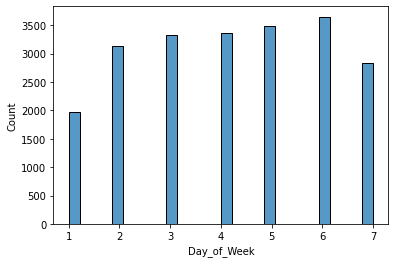

In [ ]:
ped_day = acc_cas[acc_cas['Casualty_Class']==3]
sns.histplot(ped_day['Day_of_Week'])
plt.show()

#(d) What impact if any does daylight savings have on road traffic accidents in the week after it starts and stops?

- Daylight saving start on 31 March in 2019 and stopped on 27 of October.

In [ ]:
def daylight(x):
    if x == 1:
        return "Daylight Start"
    else:
        return "Daylight Stop"
    
acc_df["daylight"] = acc_df["Light_Conditions"].apply(daylight)




daylight_week = acc_df.groupby(["Day_of_Week", "daylight"])["daylight"].agg(["count"]).reset_index()
daylight_week

,Day_of_Week,daylight,count
0,1,Daylight Start,8494
1,1,Daylight Stop,4441
2,2,Daylight Start,12276
3,2,Daylight Stop,4367
4,3,Daylight Start,12965
5,3,Daylight Stop,4633
6,4,Daylight Start,13111
7,4,Daylight Stop,4664
8,5,Daylight Start,13025
9,5,Daylight Stop,4948


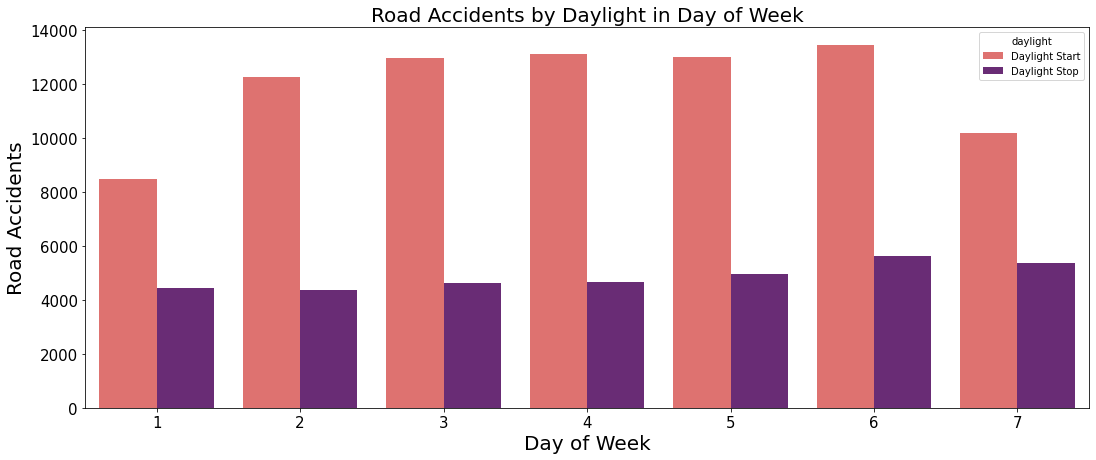

In [ ]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Day_of_Week", y = "count", hue = "daylight", data = daylight_week, palette = "magma_r")
plt.title("Road Accidents by Daylight in Day of Week", size = 20)
plt.xlabel("Day of Week", size = 20)
plt.ylabel("Road Accidents", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

#(e)What impact, if any, does sunrise and sunset times have on road traffic accidents?

#(f) Are there particular types of vehicles that are more frequently involved in road traffic accidents?

####Accident distribution on vehicle
- Code 9 represent car



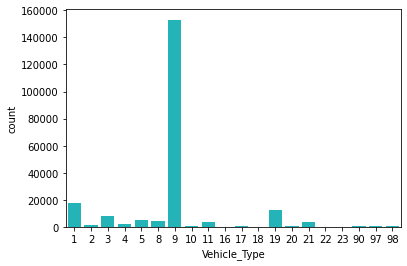

In [ ]:
sns.countplot( x=veh_df['Vehicle_Type'], color='#0bcad0')

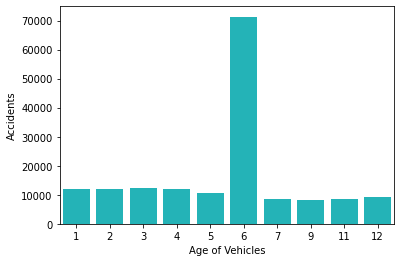

In [ ]:
veh_age = veh_df["Age_of_Vehicle"].value_counts().to_frame().reset_index()
veh_age.columns = ["Age of Vehicles", "Accidents"]
veh_age = veh_age.head(10)
veh_age = veh_age.sort_values(by = "Age of Vehicles")
#veh_age



sns.barplot(x = "Age of Vehicles", y = "Accidents", data = veh_age,color='#0bcad0')


####Accident distribution by vehicle propulsion

- Propulsion code 1 is for petrol and 2 is for heavy oil

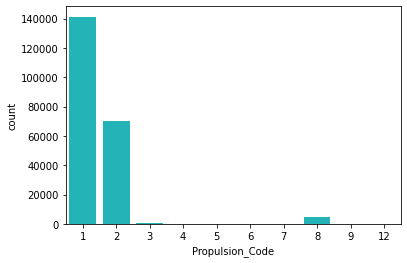

In [ ]:
sns.countplot( x=veh_df['Propulsion_Code'], color='#0bcad0')

####Accident distribution by 'was the car left drive'
- Code 1 means No
- Code 2 means Yes

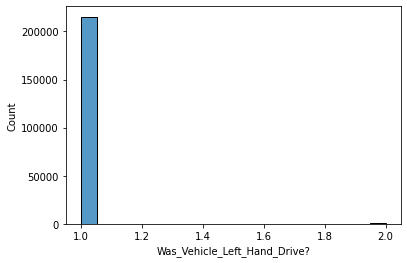

In [ ]:
sns.histplot( x=veh_df['Was_Vehicle_Left_Hand_Drive?'])

#(g)Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

####Accident distribution by weather condition

- Code 1 means fine no high wind
- Code 2 means Raining no high wind

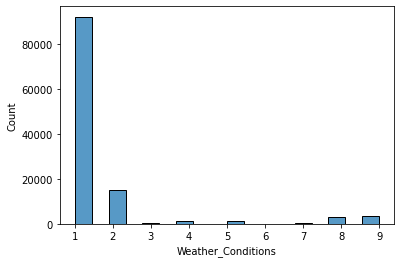

In [ ]:
sns.histplot(x=acc_df['Weather_Conditions'])

####Accident distribution by Local Authority District(geographical Location)

- 300 is Birmingham
- 204 is Leads
- 1 is Westminster

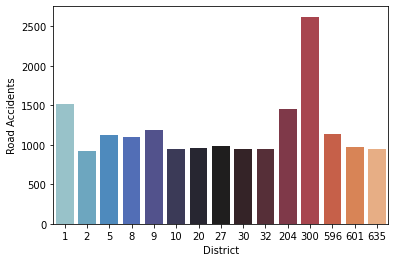

In [ ]:
geo_loc = acc_df["Local_Authority_(District)"].value_counts().to_frame().reset_index()
geo_loc.columns = ["District", "Road Accidents"]
geo_loc=geo_loc.head(15)
sns.barplot(x = "District", y = "Road Accidents", data = geo_loc, palette = "icefire", color='#0bcad0')

####where Accident occurs arround uk using geopandas

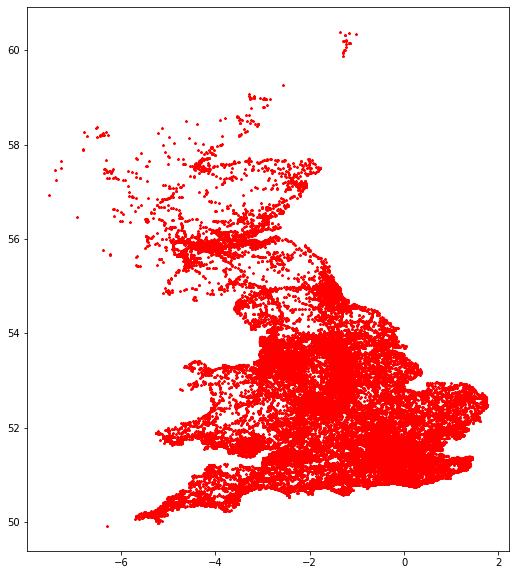

In [ ]:
points = [Point(p) for p in zip(acc_df['Longitude'], acc_df['Latitude'])]
uk_gdf = GeoDataFrame(acc_df, geometry=points)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
uk_gdf.plot(ax=world[world.name=='United Kingdom'].plot(figsize=(10, 10)), marker='*', color='red', markersize=5)

In [ ]:
acc_df['Latitude'].unique()

array([51.508057, 51.436208, 51.526795, ..., 54.991685, 55.148292,
       55.357237])

####where Accident occurs arround uk using seaborn

Text(0.5, 1.0, 'Accidents throughout the United Kingdom')

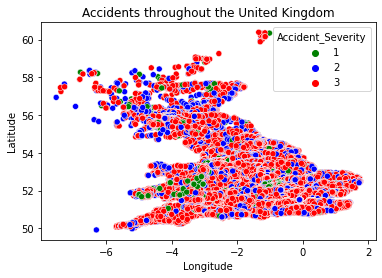

In [ ]:
#fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x = 'Longitude',y = 'Latitude',data = acc_df, hue = 'Accident_Severity',palette=['green','blue','red']).set_title('Accidents throughout the United Kingdom')

##Situation around Old Trafford 

In [ ]:
#sundays = clean_acc_df.loc[df['Day_of_Week']==1]
#Manchester_Area = clean_acc_df.loc[clean_acc_df['Police_Force']==6]
Man_Sun = clean_acc_df.loc[(clean_acc_df['Police_Force']==6) & (clean_acc_df['Day_of_Week']==1)]
Manchester_Sunday = Man_Sun["Date"].value_counts().sort_index().to_frame().reset_index()
Manchester_Sunday.columns = ["Date", "Accidents"]

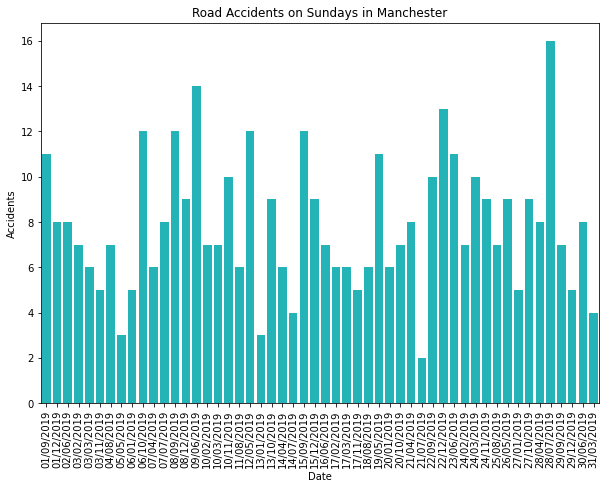

In [ ]:
#sns.set_style("whitegrid")
plt.figure(figsize = (10, 7))
ax = sns.barplot(x = "Date", y = "Accidents", data = Manchester_Sunday, color='#0bcad0')
plt.title("Road Accidents on Sundays in Manchester")
plt.xlabel("Date")
plt.ylabel("Accidents")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [ ]:
import folium
import geopy.distance
from geopy.distance import Distance
from folium import plugins

In [ ]:
map = folium.Map(location=[53.463493, -2.292279], tiles="OpenStreetMap", zoom_start=8)    # Using manchester longitude and latitude
map.add_child(folium.Marker([53.463493, -2.292279],
                           popup="Accident",
                           icon=folium.Icon(color="red")
                           
                           ))

In [ ]:
def geometric_distance(row):
    if geopy.distance.distance((53.463493, -2.292279), (row['Longitude'], row['Latitude'])) <= 6:
        return True
    else:
        return False

In [ ]:
radius = acc_df[["Longitude","Latitude"]].apply(geometric_distance, axis=1)
acc_df['radius'] = clean_acc_df.apply(geometric_distance, axis=1)

#(h) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

####Accident distribution by band age of driver

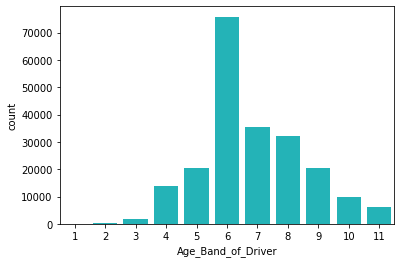

In [ ]:
sns.countplot(data=veh_df, x='Age_Band_of_Driver', color='#0bcad0')
plt.show()

####Accident distribution by sex of driver

- 1  Male
- 2 Female
- Unknown

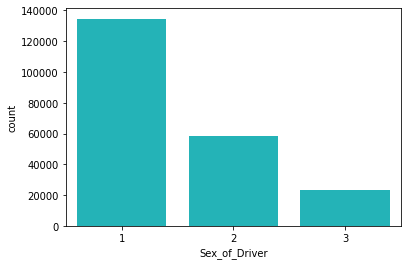

In [ ]:
sns.countplot(data=veh_df, x='Sex_of_Driver', color='#0bcad0')
plt.show()

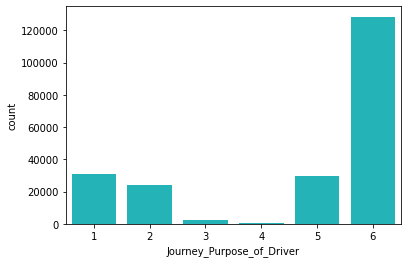

In [ ]:
sns.countplot(data=veh_df, x='Journey_Purpose_of_Driver', color='#0bcad0')
plt.show()

#(i)Can we make predictions about when and where accidents will occur and the severity of the injuries sustained from the data supplied to improve road safety?How well do our models compare to government models? 

## Hypothesis

In [ ]:
# Merging two data sets into one with inner join by index
acc_cas = pd.merge(acc_df, cas_df, on = ['Accident_Index'])
acc_cas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153158 entries, 0 to 153157
Data columns (total 47 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               153158 non-null  string 
 1   Location_Easting_OSGR                        153116 non-null  float64
 2   Location_Northing_OSGR                       153116 non-null  float64
 3   Longitude                                    153116 non-null  float64
 4   Latitude                                     153116 non-null  float64
 5   Police_Force                                 153158 non-null  int64  
 6   Accident_Severity                            153158 non-null  int64  
 7   Number_of_Vehicles                           153158 non-null  int64  
 8   Number_of_Casualties                         153158 non-null  int64  
 9   Date                                         153158 non-nul

## Using 3 rules
- Rule1: if speed limit=20mph, then Accident Severity = slight
- Rule2: if speed limit=70mph, then Accident Severity = Fatal
- Rule3: if Pedestrian Crossing Code = Zebra, then Casualty Type = Pedestrian 

#### Support

In [ ]:
def support():
    support_= []
    total =len(clean_acc_df)
    total_combined = len(acc_cas)

    support_rule1 =(len(acc_df[(acc_df['Speed_limit'] == 20) & (acc_df['Accident_Severity']== 3)]))/total


    support_rule2 =(len(clean_acc_df[(clean_acc_df['Speed_limit'] == 70) & (clean_acc_df['Accident_Severity']== 1)]))/total

    
    support_rule3 = (len(acc_cas[(acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1) & (acc_cas['Casualty_Type']== 0)]))/total_combined

    
    
    support_1A = len(acc_df[acc_df['Speed_limit'] == 20])/total
    support_2A = len(acc_df[acc_df['Speed_limit'] == 70])/total
    support_3A = len(acc_cas[acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1])/total_combined
    
    support_1B = len(acc_df[acc_df['Accident_Severity']== 3])/total
    support_2B = len(acc_df[acc_df['Accident_Severity']== 1])/total
    support_3B = len (acc_cas[acc_cas['Casualty_Type']== 0])/total_combined
                                    
    
    support_.append({'Rule1':support_rule1, 'Rule2':support_rule2,'Rule3':support_rule3,
                           'Support 1A':support_1A, 'Support 2A': support_2A, 'Support 3A':support_3A,
                          'Support 1B':support_1B, 'Support 2B': support_2B, 'Support 3B': support_3B })
    
    return support_

In [ ]:
support = support()
support

[{'Rule1': 0.0836594745439695,
  'Rule2': 0.0017441464742717124,
  'Rule3': 0.012007208242468563,
  'Support 1A': 0.09994384699156003,
  'Support 1B': 0.7866185679281241,
  'Support 2A': 0.060857949904710044,
  'Support 2B': 0.014106316362646339,
  'Support 3A': 0.036393789420076,
  'Support 3B': 0.1421407957795218}]

#### Confidence

In [ ]:
def confidence():
    confidence_ = []
    
    frequency_A1 = len(acc_df[acc_df['Speed_limit'] == 20])
    confidence_rule_1 = (len(acc_df[(acc_df['Speed_limit'] == 20) & (acc_df['Accident_Severity']== 3)]))/frequency_A1
   
    
    frequency_A2 = len(acc_df[acc_df['Speed_limit'] == 70])
    confidence_rule_2 = (len(acc_df[(acc_df['Speed_limit'] == 70) & (acc_df['Accident_Severity']== 1)]))/frequency_A2
                               
    
    frequency_A3 =  len(acc_cas[acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1])
    confidence_rule_3 = (len(acc_cas[(acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1) & (acc_cas['Casualty_Type']== 0)]))/frequency_A3
    
    confidence_.append({'Confidence 01': confidence_rule_1, 'Confidence 02':confidence_rule_2, 'Confidence 03': confidence_rule_3})
    
    return confidence_

In [ ]:
confidence = confidence()
confidence
#70miles an hour is one of the safest zones

[{'Confidence 01': 0.8370647824976589,
  'Confidence 02': 0.02865930378862016,
  'Confidence 03': 0.32992465016146394}]

#### Completeness

In [ ]:
def completeness():
    completeness_ = []

    frequency_B1 = len(acc_df[acc_df['Accident_Severity']== 3])
    complete_01 = (len(acc_df[(acc_df['Speed_limit'] == 20) & (acc_df['Accident_Severity']== 3)]))/frequency_B1
    
    
    fequency_B2 = len(acc_df[acc_df['Accident_Severity']== 1])
    complete_02 = (len(acc_df[(acc_df['Speed_limit'] == 70) & (acc_df['Accident_Severity']== 1)]))/fequency_B2
    
    
    frequency_B3 = len(acc_cas[acc_cas['Casualty_Type']== 0])
    complete_03 =(len(acc_cas[(acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1) & (acc_cas['Casualty_Type']== 0)]))/frequency_B3

    completeness_.append({'Completeness 1': complete_01, 'Completness 2':complete_02, 'Completeness 3': complete_03})
    
    return completeness_

In [ ]:
Completeness = completeness()
Completeness

[{'Completeness 1': 0.10635329237691442,
  'Completeness 3': 0.08447404685346807,
  'Completness 2': 0.12364294330518698}]

#### Lifts

In [ ]:
def lifts():
    lift_ = []
    
    lift_01 = round((support[0]['Rule1']/(support[0]['Support 1A']* support[0]['Support 1B'])),2)
    
    lift_02 = round((support[0]['Rule2']/(support[0]['Support 2A']* support[0]['Support 2B'])),2)
    
    lift_03 = round((support[0]['Rule3']/ (support[0]['Support 3A']* support[0]['Support 3B'])),2)
    
    lift_.append({'Lift 1': lift_01, 'Lift 2': lift_02, 'Lift 3': lift_03})
    
    return lift_

In [ ]:
Lifts = lifts()
Lifts

[{'Lift 1': 1.06, 'Lift 2': 2.03, 'Lift 3': 2.32}]

#### Conviction

In [ ]:
def conviction():
    
    conviction_ = []
    
    conviction_01 =  round(((1- (support[0]['Support 1B']))/(1-(confidence[0]['Confidence 01']))),2)
    conviction_02 = round(((1- (support[0]['Support 2B']))/(1-(confidence[0]['Confidence 02']))),2)
    conviction_03 = round(((1- (support[0]['Support 3B']))/(1-(confidence[0]['Confidence 02']))),2)
    
    conviction_.append({'Conviction_01': conviction_01, 'Conviction_02': conviction_01, 'Conviction_03': conviction_03})
    
    return conviction_
    

In [ ]:
Conviction = conviction()
Conviction

[{'Conviction_01': 1.31, 'Conviction_02': 1.31, 'Conviction_03': 0.88}]

#### Piatetsky- Shapiro Rule Interestingness

In [ ]:
def sri():
    sri_ = []
    total = len(acc_df)
    total_combined = len(acc_cas)

    frequency_A = len(acc_df[acc_df['Speed_limit'] == 20])
    frequency_B = len(acc_df[acc_df['Accident_Severity']== 3])
    frequency_AB = len(acc_df[(acc_df['Speed_limit'] == 20) & (acc_df['Accident_Severity']== 3)])
    
    sri_1 = round(( frequency_AB -((frequency_A * frequency_B)/total)),2)
    
    
    frequency_A2 = len(acc_df[acc_df['Speed_limit'] == 70])
    frequency_B2 = len(acc_df[acc_df['Accident_Severity']== 1])
    frequency_AB2 = len(acc_df[(acc_df['Speed_limit'] == 70) & (acc_df['Accident_Severity']== 1)])
    
    sri_2 = round(( frequency_AB2 -((frequency_A2 * frequency_B2)/total)),2)
    
    frequency_AB3 = (len([(acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1) & (acc_cas['Casualty_Type']== 0)]))
    frequency_A3 =  len(acc_cas[acc_cas['Pedestrian_Crossing-Physical_Facilities'] == 1])
    frequency_B3 = len(acc_cas[acc_cas['Casualty_Type']== 0])
    
    sri_3 = round(( frequency_AB3 -((frequency_A3 * frequency_B3)/total_combined)),2)
    
    sri_.append({'RI 1':sri_1, 'RI 2':sri_2, 'RI 3': sri_3})
    
    return sri_

In [ ]:
sri = sri()
sri

[{'RI 1': 592.59, 'RI 2': 104.1, 'RI 3': -791.29}]

## Using the combination of speed limit and Accident Severity below will give us 18 different rules

In [ ]:
speed_limit = acc_cas['Speed_limit'].unique()
print(speed_limit)

accidents_severity = acc_cas['Accident_Severity'].unique()
print(accidents_severity)

[30 20 40 50 70 60]
[3 2 1]


## APRIORI Algorithm

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
a = pd.get_dummies(acc_df.Accident_Severity, prefix= 'Severity')
b = pd.get_dummies(acc_df.Speed_limit, prefix= 'Speed')
c = pd.get_dummies(acc_df.Weather_Conditions, prefix= 'Weather')
speed_weather = pd.concat([a, b, c], ignore_index=False, axis = 1)
apriori(speed_weather, min_support=0.2, use_colnames=True) #generates itemsets that are supported


,support,itemsets
0,0.786619,(Severity_3)
1,0.590330,(Speed_30)
2,0.785427,(Weather_1)
3,0.475097,"(Speed_30, Severity_3)"
4,0.614169,"(Severity_3, Weather_1)"
5,0.465713,"(Speed_30, Weather_1)"
6,0.373690,"(Speed_30, Severity_3, Weather_1)"


In [ ]:
from mlxtend.frequent_patterns import association_rules


frequent_itemsets = apriori(speed_weather, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Speed_30),(Severity_3),0.590330,0.786619,0.475097,0.804799,1.023113,0.010733,1.093139
1,(Severity_3),(Speed_30),0.786619,0.590330,0.475097,0.603974,1.023113,0.010733,1.034452
2,(Severity_3),(Weather_1),0.786619,0.785427,0.614169,0.780771,0.994072,-0.003663,0.978762
3,(Weather_1),(Severity_3),0.785427,0.786619,0.614169,0.781955,0.994072,-0.003663,0.978614
4,(Speed_30),(Weather_1),0.590330,0.785427,0.465713,0.788903,1.004424,0.002051,1.016462
5,(Weather_1),(Speed_30),0.785427,0.590330,0.465713,0.592942,1.004424,0.002051,1.006416
6,"(Speed_30, Severity_3)",(Weather_1),0.475097,0.785427,0.373690,0.786555,1.001435,0.000536,1.005281
7,"(Speed_30, Weather_1)",(Severity_3),0.465713,0.786619,0.373690,0.802404,1.020068,0.007352,1.079888
8,"(Severity_3, Weather_1)",(Speed_30),0.614169,0.590330,0.373690,0.608448,1.030691,0.011127,1.046272
9,(Speed_30),"(Severity_3, Weather_1)",0.590330,0.614169,0.373690,0.633019,1.030691,0.011127,1.051363


In [ ]:
#Use k-means on the geographic coordinates with the number of clusters = 25 and see what happens
coordinates = acc_df[['Longitude','Latitude']]

kmeans = KMeans(n_clusters= 25)
kmeans.fit(coordinates)

KMeans(n_clusters=25)

In [ ]:
labels = kmeans.predict(coordinates)
labels

array([ 0,  0,  0, ..., 11, 11,  3], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_

centroids[:5]

array([[-0.11366155, 51.51778732],
       [-2.28928854, 53.4701156 ],
       [-3.20611831, 51.70361089],
       [-3.21632006, 56.02297031],
       [-1.98230975, 51.71371643]])

In [ ]:

#fig = plt.figure(figsize = (10,15))
#colors = map(lambda x: colmap[x+1],labels)
#plt.scatter(coordinates['Longitude'], coordinates['Latitude'], color = 'blue')
#plt.xlim(-10, 10)
#plt.ylim(-10, 1500)
#plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
#plt.show()

In [ ]:
clusters = [25]
for value in clusters:
    new_kmeans = KMeans(n_clusters=value)
    kmeans.fit(coordinates)
    print(kmeans.inertia_)
# def calculate_inertia(n):
#   return kmeans.inertia_

13141.01234363517


In [ ]:
clusters = [25, 30, 35, 40, 45, 50]
for value in clusters:
    new_kmeans = KMeans(n_clusters=value)
    kmeans.fit(coordinates)
    print(kmeans.inertia_)

12984.040441086214
12974.669438934707
13132.919232154443
12817.838911845844
13227.764091865394
13077.532040489803


In [ ]:
Sum_of_squared_distances = []
K = range(25,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(coordinates)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
speed_weather = clean_acc_df[['Speed_limit','Weather_Conditions']]

kmeans = KMeans(n_clusters= 6)
kmeans.fit(speed_weather)

labels = kmeans.predict(speed_weather)

centroids = kmeans.cluster_centers_
centroids

array([[60.        ,  1.61891966],
       [30.        ,  1.67088955],
       [19.85795214,  1.78650545],
       [40.        ,  1.54196188],
       [70.        ,  1.56060394],
       [50.        ,  1.53880407]])

In [ ]:
#fig = plt.figure(figsize = (5,5))
#colors = map(lambda x: colmap[x+1], labels)
#plt.scatter(speed_weather['Speed_limit'], speed_weather['Weather_Conditions'], color = 'blue')
#plt.xlim(0, 10)
#plt.ylim(-10, 80)
#plt.scatter(centroids[:,0],centroids[:,1], color = 'orange')
#plt.show()

- Assuming weather is contributing to accident severity. 
- What other factors do you think might contribute. Make a list of your top 5. 
- Light Conditions
- Road surface condition
- Carriage hazards
- Special Conditions at site
- Urban or rural areas

In [ ]:
acc = acc_df.reset_index(drop=True)

predictor = ['Light_Conditions', 'Special_Conditions_at_Site', 'Road_Surface_Conditions', 'Carriageway_Hazards','Urban_or_Rural_Area']
target = ['Accident_Severity']


In [ ]:
predictor = ['Light_Conditions', 'Special_Conditions_at_Site', 'Road_Surface_Conditions', 'Carriageway_Hazards','Urban_or_Rural_Area']

target = ['Accident_Severity']

In [ ]:
X = acc.loc[:, predictor].values
y = acc.loc[:, target].values

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
final = pd.concat([principal_df, acc_df[target]], axis = 1)
final[:2]

,principal component 1,principal component 2,Accident_Severity
0,-1.071641,-0.145090,3
1,1.920261,-0.194409,3


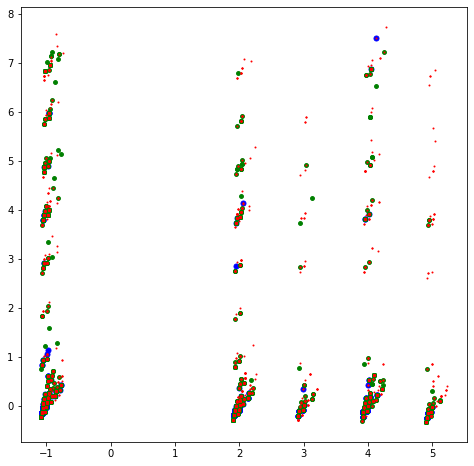

In [ ]:
one = final[final['Accident_Severity'] == 1]
two = final[final['Accident_Severity'] == 2]
three = final[final['Accident_Severity'] == 3]

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(one['principal component 1'], one['principal component 2'], color='blue', s=25)
ax1.scatter(two['principal component 1'], two['principal component 2'], color='green', s=15)
ax1.scatter(three['principal component 1'], three['principal component 2'], color='red', s=1)

#plt.xlim(6.45, 6.65)
#plt.ylim(-2, 10)

plt.show()

#### Modify your code so that you have Latitude, Longitude, Day of the week, and Weather conditions as the input to the PCA. 

In [ ]:
features = ['Longitude', 'Latitude', 'Day_of_Week', 'Weather_Conditions']
target = ['Accident_Severity']

In [ ]:
x = acc_df.loc[:, features].values
y = acc_df.loc[:, target].values

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
final_02 = pd.concat([principal_df, acc_df[target]], axis = 1)
final_02[:2]

,principal component 1,principal component 2,Accident_Severity
0,-2.18042,-0.303713,3
1,-1.18897,-0.427517,3


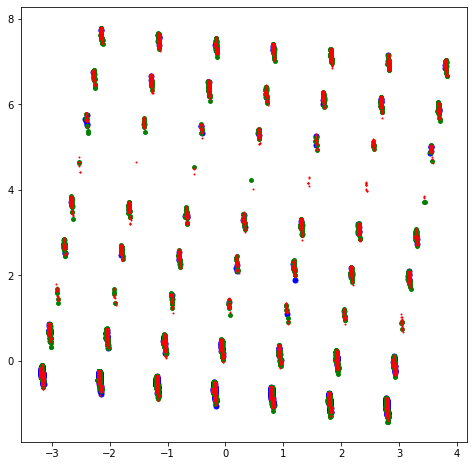

In [ ]:
one = final_02[final_02['Accident_Severity'] == 1]
two = final_02[final_02['Accident_Severity'] == 2]
three = final_02[final_02['Accident_Severity'] == 3]

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.scatter(one['principal component 1'], one['principal component 2'], color='blue', s=25)
ax1.scatter(two['principal component 1'], two['principal component 2'], color='green', s=15)
ax1.scatter(three['principal component 1'], three['principal component 2'], color='red', s=1)

#plt.xlim(6.45, 6.65)
#plt.ylim(-2, 10)

plt.show()

In [ ]:
veh_df.head(2)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,18,0,0,0,0,0,...,6,1,58,9,1390,1,6,2,1,2
1,2019010128300,2,9,0,18,0,0,0,0,0,...,6,3,35,6,1390,1,6,2,1,2


### Which variables actually are the best at predicting fatalities within the accident database. 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

acc_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'daylight', 'geometry', 'radius'],
      dtype='object')

In [ ]:
predictors = ["Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions"]

# to filter the required features
accident = acc_df
accident = accident.reset_index(drop=True)
accident = accident.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions', 'Accident_Severity'], axis=1)
accident_df = accident[(accident['Weather_Conditions']>0) & (accident['Speed_limit']>0) & (accident['Road_Surface_Conditions']>0) & (accident['Light_Conditions']>0)]

#### Perform the feature selection




In [ ]:
selector = SelectKBest(f_classif, k="all")
selector.fit(accident_df[predictors], accident_df["Accident_Severity"])

SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

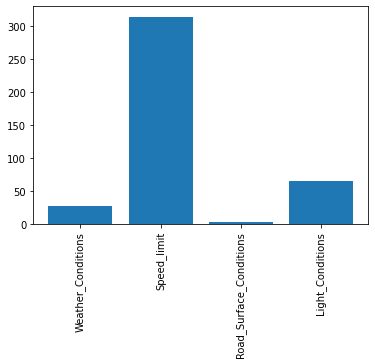

In [ ]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


#### This shows that Speed_limit is the main factor out of the ones that we have looked at. 
#### Question: are you surprised by this at all?


In [ ]:
#Expand the features that you are considering. Which ones at the top X (where X might be 4, 5, or so)?

further_predictors = ["Weather_Conditions", "Speed_limit", "Road_Surface_Conditions", "Light_Conditions", "Road_Type",
                      "Urban_or_Rural_Area","Carriageway_Hazards", "Special_Conditions_at_Site"]

accidents_df = clean_acc_df.dropna()
accidents_df.reset_index(drop=True)

accidents_df = accidents_df.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions',
                          'Road_Type','Urban_or_Rural_Area','Carriageway_Hazards','Special_Conditions_at_Site','Accident_Severity'], axis=1)



accidents_df01 = accidents_df[(accidents_df['Weather_Conditions']>0) & (accidents_df['Speed_limit']>0) & (accidents_df['Road_Surface_Conditions']>0) & 
                       (accidents_df['Light_Conditions']>0)& (accidents_df['Road_Type']>0) & (accidents_df['Urban_or_Rural_Area']>0) & (accidents_df['Carriageway_Hazards']>0)
                        & (accidents_df['Special_Conditions_at_Site']>0)]

accidents_df01.sample(5)

,Weather_Conditions,Speed_limit,Road_Surface_Conditions,Light_Conditions,Road_Type,Urban_or_Rural_Area,Carriageway_Hazards,Special_Conditions_at_Site,Accident_Severity
95233,1,60,2,1,6,2,2,7,2
13027,1,20,1,4,3,1,2,4,3
111100,1,60,1,6,6,2,2,7,3
12573,1,30,1,1,3,1,2,4,3
87731,1,70,1,6,3,2,3,4,3


In [ ]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(accidents_df01[further_predictors], accidents_df01["Accident_Severity"])

SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

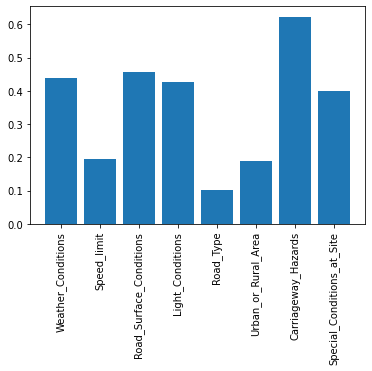

In [ ]:
# Use plt to plot the scores!  
plt.bar(range(len(further_predictors)), scores)
plt.xticks(range(len(further_predictors)), further_predictors, rotation='vertical')
plt.show()

In [ ]:
veh_df.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [ ]:
total_combined = pd.merge(acc_df, veh_df, on = ['Accident_Index']) #Combine all
total_combined.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,1390,1,6,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,35,6,1390,1,6,2,1,2


In [ ]:
total_predictors = ['Sex_of_Driver','Age_Band_of_Driver', 'Age_of_Vehicle', 'Vehicle_Type', 'Vehicle_Location-Restricted_Lane', 'Skidding_and_Overturning', 
                 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Junction_Location',
                 'Engine_Capacity_(CC)', 'Vehicle_Leaving_Carriageway', 'Journey_Purpose_of_Driver', 'Propulsion_Code', 'Driver_IMD_Decile', 
                 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile']

In [ ]:
#to get rid of negative values
total_combined_2 = total_combined.dropna()
total_combined_2.reset_index(drop=True).sample(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
42735,2019010224323,532711.0,184263.0,-0.087686,51.541672,1,2,2,1,11/12/2019,...,2,2,35,6,1390,1,6,3,1,3
176888,2019470903814,514196.0,102815.0,-0.380403,50.813629,47,2,1,1,28/11/2019,...,1,1,24,5,996,1,5,6,1,6
67880,2019100841919,436093.0,563748.0,-1.437790,54.967064,10,3,2,2,22/05/2019,...,6,2,32,6,1242,1,10,1,1,1


In [ ]:
total_combined_2= total_combined_2.filter(['Sex_of_Driver','Age_Band_of_Driver', 'Age_of_Vehicle', 'Vehicle_Type', 'Vehicle_Location-Restricted_Lane', 'Skidding_and_Overturning', 
                                    'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Junction_Location', 
                                    'Engine_Capacity_(CC)', 'Journey_Purpose_of_Driver', 'Propulsion_Code',  'Driver_Home_Area_Type', 'Vehicle_IMD_Decile', 'Driver_IMD_Decile',
                                    'Accident_Severity'], axis=1)

In [ ]:
total_combined_22 = total_combined_2[(total_combined_2['Sex_of_Driver']>0) & (total_combined_2['Age_Band_of_Driver']>0) & (total_combined_2['Age_of_Vehicle']>0) & 
                             (total_combined_2['Vehicle_Type']>0) & (total_combined_2['Vehicle_Location-Restricted_Lane']>0) & (total_combined_2['Skidding_and_Overturning']>0) &
                             (total_combined_2['Hit_Object_off_Carriageway']>0) & (total_combined_2['Vehicle_Leaving_Carriageway']>0) & (total_combined_2['Hit_Object_in_Carriageway']>0)  &
                             (total_combined_2['1st_Point_of_Impact']>0) & (total_combined_2['Junction_Location']>0) & (total_combined_2['Engine_Capacity_(CC)']>0) &
                             (total_combined_2['Journey_Purpose_of_Driver']>0) & (total_combined_2['Propulsion_Code']>0) & (total_combined_2['Vehicle_IMD_Decile']>0) &
                             (total_combined_2['Driver_IMD_Decile']>0) & (total_combined_2['Driver_Home_Area_Type']>0) ]

total_combined_22.head(2)

,Sex_of_Driver,Age_Band_of_Driver,Age_of_Vehicle,Vehicle_Type,Vehicle_Location-Restricted_Lane,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Junction_Location,Engine_Capacity_(CC),Journey_Purpose_of_Driver,Propulsion_Code,Driver_Home_Area_Type,Vehicle_IMD_Decile,Driver_IMD_Decile,Accident_Severity
790,1,5,6,9,9,1,10,1,11,1,5,1390,6,1,1,6,6,3
4103,1,6,6,9,9,1,4,7,10,4,2,1390,6,1,1,4,4,2


In [ ]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(total_combined_22[total_predictors], total_combined_22["Accident_Severity"])

SelectKBest(k='all')

In [ ]:
# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

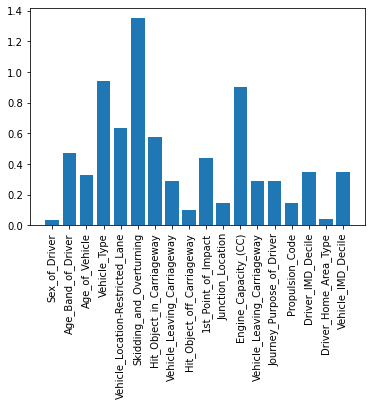

In [ ]:
# Use plt to plot the scores!  
plt.bar(range(len(total_predictors)), scores)
plt.xticks(range(len(total_predictors)), total_predictors, rotation='vertical')
plt.show()

In [ ]:
total_combined.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'daylight', 'geometry', 'radius',
       'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_

In [ ]:
total_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216381 entries, 0 to 216380
Data columns (total 57 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Accident_Index                               216381 non-null  object  
 1   Location_Easting_OSGR                        216381 non-null  float64 
 2   Location_Northing_OSGR                       216381 non-null  float64 
 3   Longitude                                    216381 non-null  float64 
 4   Latitude                                     216381 non-null  float64 
 5   Police_Force                                 216381 non-null  int64   
 6   Accident_Severity                            216381 non-null  int64   
 7   Number_of_Vehicles                           216381 non-null  int64   
 8   Number_of_Casualties                         216381 non-null  int64   
 9   Date                                         216

In [ ]:
predictors_ = ['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions','Road_Type','Urban_or_Rural_Area','Carriageway_Hazards',
                 'Special_Conditions_at_Site', 'Sex_of_Driver','Age_Band_of_Driver', 'Age_of_Vehicle', 'Vehicle_Type', 'Vehicle_Location-Restricted_Lane', 
                 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 
                 'Junction_Location', 'Engine_Capacity_(CC)', 'Vehicle_Leaving_Carriageway', 'Journey_Purpose_of_Driver', 'Propulsion_Code', 'Driver_IMD_Decile', 
                 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile']

In [ ]:
total_combined
total_combined= total_combined.dropna()

total_combined.reset_index(drop=True).head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,1390,1,6,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,3,35,6,1390,1,6,2,1,2


In [ ]:
combined_024 = total_combined.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions','Road_Type','Urban_or_Rural_Area',
                                    'Carriageway_Hazards', 'Special_Conditions_at_Site', 'Accident_Severity'], axis=1)

In [ ]:
combined_0245 = combined_024[(combined_024['Weather_Conditions']>0) & (combined_024['Speed_limit']>0) & (combined_024['Road_Surface_Conditions']>0) & 
                             (combined_024['Light_Conditions']>0)& (combined_024['Road_Type']>0) & (combined_024['Urban_or_Rural_Area']>0) & 
                             (combined_024['Carriageway_Hazards']>0) & (combined_024['Special_Conditions_at_Site']>0)]

In [ ]:
from sklearn.model_selection import train_test_split

y_target = combined_0245["Accident_Severity"].values
X_features = combined_0245.drop("Accident_Severity", axis=1)

X_train, X_validation, y_train, y_validation = train_test_split(X_features, y_target, test_size=.25,random_state=1)

In [ ]:
#Let’s build the model now. 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="gini") 

decision_tree.fit(X_train, y_train) 
 
Y_pred = decision_tree.predict(X_validation) 

In [ ]:
#This next line computes the accuracy of the model.
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print(acc_decision_tree)

95.42


In [ ]:
decision_tree.predict_proba(X_validation)

array([[0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.1       , 0.9       ],
       [0.        , 0.        , 1.        ],
       [0.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [ ]:
features = ['Weather_Conditions', 'Speed_limit', 'Road_Surface_Conditions', 'Light_Conditions', 'Road_Type','Urban_or_Rural_Area', 'Carriageway_Hazards', 'Special_Conditions_at_Site',]
target = ['Accident_Severity']

In [ ]:
accidents_data = acc_df
accidents_data.reset_index(drop=True).head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,daylight,geometry,radius
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1,1,0,0,1,3,E01004762,Daylight Start,POINT (-0.15384 51.50806),False
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,1,1,0,0,1,3,E01003117,Daylight Stop,POINT (-0.12795 51.43621),False
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,1,1,0,0,1,1,E01000943,Daylight Stop,POINT (-0.12419 51.52679),False


In [ ]:
accidents_data01 = accidents_data.filter(['Weather_Conditions','Speed_limit','Road_Surface_Conditions', 'Light_Conditions','Road_Type','Urban_or_Rural_Area',
                                    'Carriageway_Hazards', 'Special_Conditions_at_Site', 'Accident_Severity'], axis=1)

In [ ]:
accidents_data02 = accidents_data01[(combined_024['Weather_Conditions']>0) & (combined_024['Speed_limit']>0) & (combined_024['Road_Surface_Conditions']>0) & 
                                    (combined_024['Light_Conditions']>0)& (combined_024['Road_Type']>0) & (combined_024['Urban_or_Rural_Area']>0) & 
                                    (combined_024['Carriageway_Hazards']>0) & (combined_024['Special_Conditions_at_Site']>0)]

In [ ]:
from sklearn.model_selection import train_test_split

y_target = accidents_data02["Accident_Severity"].values
X_features = accidents_data02.drop("Accident_Severity", axis=1)

def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(X_features,y_target,test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def get_models():
    models = dict()
    models['DCTrees'] = DecisionTreeClassifier()
    models['KNN'] = KNeighborsClassifier()
    models['LR'] = LogisticRegression()
    models['SVM'] = SVC()
    models['Bayes'] = GaussianNB()
    return models

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
#Grab hold of the dataset.
X, y = get_dataset()

#Grab the models to use.
models = get_models()

>DCTrees 0.757 (0.109)
>KNN 0.754 (0.067)
>LR 0.797 (0.079)
>SVM 0.808 (0.031)
>Bayes 0.281 (0.098)


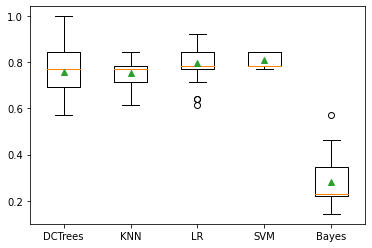

In [ ]:
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('DCTrees', DecisionTreeClassifier()))
    level0.append(('KNN', KNeighborsClassifier()))
    level0.append(('LR', LogisticRegression()))
    level0.append(('Bayes', GaussianNB()))
    level0.append(('SVM', SVC()))
    level1 = SVC()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:

# get a list of models to evaluate
def get_models():
  models = dict()
  models['LR'] = LogisticRegression()
  models['KNN'] = KNeighborsClassifier()
  models['DCTrees'] = DecisionTreeClassifier()	
  models['Bayes'] = GaussianNB()
  models['SVM'] = SVC()
  models['stacking'] = get_stacking()
  return models

In [ ]:
#Grab hold of the dataset.
X, y = get_dataset()

#Grab the models to use.
models = get_models()

In [ ]:
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>LR 0.797 (0.079)
>KNN 0.754 (0.067)
>DCTrees 0.754 (0.104)
>Bayes 0.281 (0.098)
>SVM 0.808 (0.031)
>stacking 0.808 (0.031)


In [ ]:
lookup_df = pd.read_csv('/content/drive/MyDrive/Big_data/cas_adjustment_lookup_2019.csv')
lookup19_df = lookup_df[lookup_df['accident_index'].str.startswith('2019')]
lookup19_df.reset_index(drop=True, inplace=True)
lookup19_df.rename(columns={'accident_index' : 'Accident_Index'}, inplace=True)

In [ ]:
merge_lookup_df = pd.merge(slight_and_serious_casualties, lookup19_df, how='left',
                                        on=['Accident_Index', 'Vehicle_Reference'])

In [ ]:
merge_lookup_df.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1390,1,6,2,1,2,2.0,0.0,1.0,1.0
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1390,1,6,2,1,2,1.0,0.0,1.0,1.0
